In [1]:

import random
import json
import pickle
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from keras import regularizers
from keras.models import Model

##import packages
from tensorflow.keras import preprocessing, utils


import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.backend import clear_session
from keras.models import Sequential
from keras.layers import Flatten,Dense,Activation,Dropout,LSTM,Input,Conv1D,MaxPool1D,concatenate,Embedding
import tensorflow as tf

2023-02-12 21:49:59.718637: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-12 21:50:00.572649: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-12 21:50:00.572718: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-12 21:50:03.316072: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
pattern="It is not clear exactly how paracetamol works. However, it is thought to work by blocking chemical messengers in the brain that let us know when we're in pain and by affecting the chemical messengers that regulate our body temperature. "
print("before tokenize: ",pattern)
word_list=nltk.word_tokenize(pattern)
print("after tokenize: ",word_list)

before tokenize:  It is not clear exactly how paracetamol works. However, it is thought to work by blocking chemical messengers in the brain that let us know when we're in pain and by affecting the chemical messengers that regulate our body temperature. 
after tokenize:  ['It', 'is', 'not', 'clear', 'exactly', 'how', 'paracetamol', 'works', '.', 'However', ',', 'it', 'is', 'thought', 'to', 'work', 'by', 'blocking', 'chemical', 'messengers', 'in', 'the', 'brain', 'that', 'let', 'us', 'know', 'when', 'we', "'re", 'in', 'pain', 'and', 'by', 'affecting', 'the', 'chemical', 'messengers', 'that', 'regulate', 'our', 'body', 'temperature', '.']


In [3]:
import numpy as np
import yaml
import os

In [2]:
##loading the path
dir_path = './data/'
files_list = os.listdir(dir_path + os.sep)
     

NameError: name 'os' is not defined

In [18]:
#question list
questions = list()
answers = list() #answers list from yml file
 
for filepath in files_list:#opens all yml file, read it, take the questions and answers from it. 
    stream = open( dir_path + os.sep + filepath , 'rb')
    docs = yaml.safe_load(stream)##load yml file
    conversations = docs['conversations'] ##take conversations key part
    for con in conversations:
        if len( con ) > 2 : ##if the length of con means under the conversation part all the text's len if >2 
            questions.append(con[0]) ##the frist part will be added
            replies = con[ 1 : ] ##after the first part added, the replies are added.
            ans = '' ##ans has empty list
            for rep in replies: ##take rep from replies list
                ans += ' ' + rep ##adding all text and make sentenses
            answers.append( ans ) ##append it in answers list
        elif len( con )> 1: ##if the con has more than 1 length
            questions.append(con[0])
            answers.append(con[1])

answers_with_tags = list() ##tags appendings
for i in range( len( answers ) ):
    if type( answers[i] ) == str:
        answers_with_tags.append( answers[i] )
    else:
        questions.pop( i )

answers = list()
for i in range( len( answers_with_tags ) ) :
    answers.append( ' ' + answers_with_tags[i] + ' ' )


tokenizer = preprocessing.text.Tokenizer()##convert text to sequence of integers 
tokenizer.fit_on_texts( questions + answers )##fit it
 
VOCAB_SIZE = len( tokenizer.word_index )+1 ##check the sequence of integers length
print( 'VOCAB SIZE : {}'.format( VOCAB_SIZE ))

VOCAB SIZE : 418


In [19]:
import re

vocab = []
for word in tokenizer.word_index: ##then take the integer index of word which mostly common and maximum
  vocab.append(word)##append it in vocab

def tokenize(sentences):##tokenize function
  tokens_list = []##tokens_list
  vocabulary = []##vocabulary_list
  for sentence in sentences:
    sentence = sentence.lower()##convert each of the letter into lower
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)##replaced specific pattern to the sentence 
    tokens = sentence.split() ##split the words from sentence
    vocabulary += tokens##added the vocabulary
    tokens_list.append(tokens)##append it into the tokens_list
  return tokens_list, vocabulary
     


In [20]:
tokenized_questions = tokenizer.texts_to_sequences( questions )##again convert into integer sequences
maxlen_questions = max( [len(x) for x in tokenized_questions ] )
padded_questions = preprocessing.sequence.pad_sequences( tokenized_questions, maxlen = maxlen_questions, padding = 'post')
encoder_input_data = np.array(padded_questions)
print(encoder_input_data.shape, maxlen_questions)
     


# decoder_input_data
tokenized_answers = tokenizer.texts_to_sequences( answers )
maxlen_answers = max( [ len(x) for x in tokenized_answers ] )
padded_answers = preprocessing.sequence.pad_sequences( tokenized_answers , maxlen=maxlen_answers , padding='post' )
decoder_input_data = np.array( padded_answers )
print( decoder_input_data.shape , maxlen_answers )
     


(111, 9) 9
(111, 26) 26


Text(0, 0.5, 'Data range')

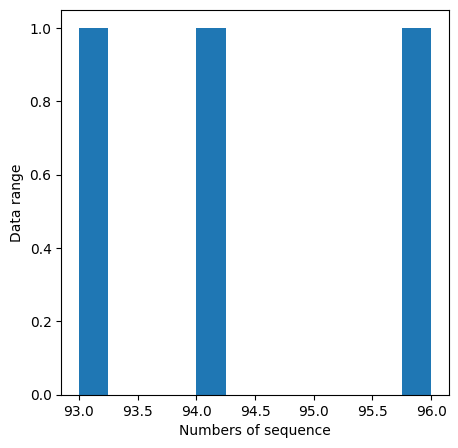

In [27]:
p=[96,94,93]
plt.figure(figsize=(5,5))

#plot
plt.hist(p,12)
plt.xlabel("Numbers of sequence")
plt.ylabel("Data range")

In [3]:
lemmatizer=WordNetLemmatizer()
intents=json.loads(open('intents.json').read())
words=[]
classes = []
documents = []
ignore_letters = ['?', '!']
 
for intent in intents['intents']:
    for pattern in intent['patterns']:
        word_list=nltk.word_tokenize(pattern)
        words.extend(word_list)
        documents.append((word_list,intent['tag'])) 
        if intent['tag'] not in classes:
            classes.append(intent['tag'])
words=[lemmatizer.lemmatize(word) for word in words if word not in ignore_letters]
words=sorted(set(words))
classes=sorted(set(classes))
pickle.dump(words,open('words.pk1','wb'))
pickle.dump(classes,open('classes.pk1','wb'))
training=[]
output_empty=[0]*len(classes)
for document in documents:
    bag=[]
    word_patterns=document[0]
    word_patterns=[lemmatizer.lemmatize(word.lower())for word in word_patterns]
    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)
    output_Row=list(output_empty)
    output_Row[classes.index(document[1])]=1
    training.append([bag,output_Row])
random.shuffle(training)
training=np.array(training)
train_x=list(training[:,0])

train_y=list(training[:,1])

/tmp/ipykernel_9150/3356668789.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training=np.array(training)


In [4]:
train_x=np.array(train_x)
train_y=np.array(train_y)
print(train_x.shape,train_y.shape)

(53, 107) (53, 13)


In [5]:
test_x=train_x[:10]
test_y=train_y[:10]

In [6]:
clear_session()
model=Sequential()

model.add(Dense(128,input_shape=(len(train_x[0]),),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]),activation='softmax'))
#sgd=SGD(learning_rate=0.01,decay=1e-6,momentum=0.9,nesterov=True)
adam=Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy",optimizer=adam,metrics=['accuracy'])
hist=model.fit(np.array(train_x),np.array(train_y),epochs=300,batch_size=5,verbose=1,validation_data=(test_x,test_y))
#model.save("voicebot_model.h5",hist)
#train_x=train_x.reshape(1,train_x.shape[0],train_x.shape[1])
#hist=model.fit(train_x,np.array(train_y),epochs=200,batch_size=5,verbose=1)
model.save("voicebot_model_dnn.h5",hist)
print('Done')

2023-02-12 21:50:33.430054: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-12 21:50:33.430705: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-12 21:50:33.430783: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Lenovoideapad32015ISK6c315432): /proc/driver/nvidia/version does not exist
2023-02-12 21:50:33.431848: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/300
11/11 [==============================] - 1s 43ms/step - loss: 2.5882 - accuracy: 0.0943 - val_loss: 2.5400 - val_accuracy: 0.1000
Epoch 2/300
11/11 [==============================] - 0s 8ms/step - loss: 2.5144 - accuracy: 0.0943 - val_loss: 2.4971 - val_accuracy: 0.1000
Epoch 3/300
11/11 [==============================] - 0s 8ms/step - loss: 2.4754 - accuracy: 0.1509 - val_loss: 2.4522 - val_accuracy: 0.3000
Epoch 4/300
11/11 [==============================] - 0s 9ms/step - loss: 2.4634 - accuracy: 0.2075 - val_loss: 2.4057 - val_accuracy: 0.4000
Epoch 5/300
11/11 [==============================] - 0s 9ms/step - loss: 2.4403 - accuracy: 0.1321 - val_loss: 2.3533 - val_accuracy: 0.5000
Epoch 6/300
11/11 [==============================] - 0s 10ms/step - loss: 2.3235 - accuracy: 0.2830 - val_loss: 2.2994 - val_accuracy: 0.6000
Epoch 7/300
11/11 [==============================] - 0s 10ms/step - loss: 2.2860 - accuracy: 0.3208 - val_loss: 2.2349 - val_accuracy: 0.6000
Epoch 8/30

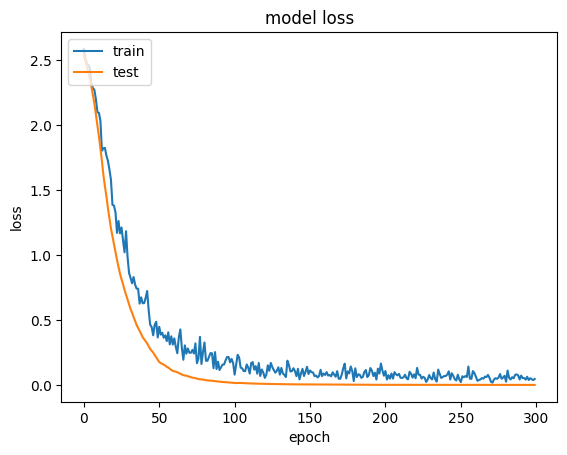

In [7]:
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show() 

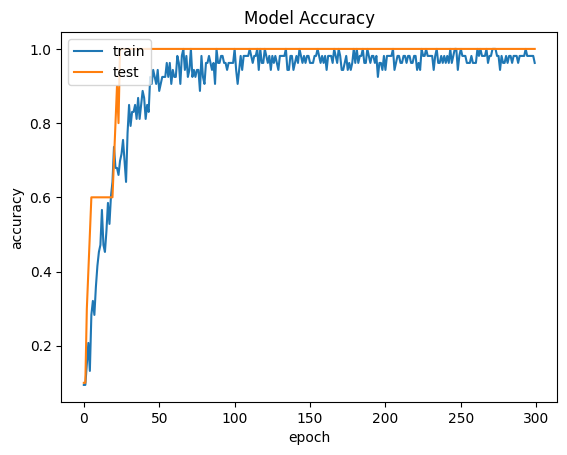

In [9]:
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.title('Model Accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show() 